# Sentiment Analysis on IMDB Dataset

## Convolutional Neural Network

## Step 1:Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


## Step 2: Load and Prepare the IMDb Dataset

In [2]:
# Load the IMDB dataset from TensorFlow datasets
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

max_length = 300
padding_type = 'post'
trunc_type = 'post'

train_data_padded = pad_sequences(train_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_data_padded = pad_sequences(test_data, maxlen=max_length, padding=padding_type, truncating=trunc_type)


17464789/17464789 [==============================] - 1s 0us/step


## Step 3: Define and Build the CNN Model

In [3]:
# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(2),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

# CNN model compile
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Step 4: Define Custom Callback for Accuracy Printout

In [4]:
# printing accuracy for each epoch
class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1} - Training Accuracy: {logs['accuracy']*100:.2f}%")
        test_loss, test_accuracy = self.model.evaluate(test_data_padded, np.array(test_labels), verbose=0)
        print(f"Epoch {epoch + 1} - Test Accuracy: {test_accuracy*100:.2f}%")


## Step 5: Train the Model with Early Stopping

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

history = cnn_model.fit(
    train_data_padded,
    np.array(train_labels),
    epochs=30, 
    validation_split=0.2,
    callbacks=[PrintAccuracy(), early_stopping]
)


Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.5598 - accuracy: 0.6956
Epoch 1 - Training Accuracy: 69.56%
Epoch 1 - Test Accuracy: 84.55%
625/625 [==============================] - 32s 49ms/step - loss: 0.5598 - accuracy: 0.6956 - val_loss: 0.3627 - val_accuracy: 0.8518
Epoch 2/30
625/625 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8752
Epoch 2 - Training Accuracy: 87.52%
Epoch 2 - Test Accuracy: 87.08%
625/625 [==============================] - 32s 51ms/step - loss: 0.3267 - accuracy: 0.8752 - val_loss: 0.2981 - val_accuracy: 0.8774
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.9395
Epoch 3 - Training Accuracy: 93.95%
Epoch 3 - Test Accuracy: 87.52%
625/625 [==============================] - 29s 47ms/step - loss: 0.1956 - accuracy: 0.9395 - val_loss: 0.2992 - val_accuracy: 0.8800
Epoch 4/30
625/625 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.9730
Epoch 4 - Tra

## Step 6: Evaluate and Print Final Test Accuracy

In [6]:
# Evaluate and print final test accuracy
final_test_loss, final_test_accuracy = cnn_model.evaluate(test_data_padded, np.array(test_labels))
print(f"\nFinal Test Accuracy: {final_test_accuracy*100:.2f}%")


782/782 [==============================] - 6s 8ms/step - loss: 0.3028 - accuracy: 0.8708

Final Test Accuracy: 87.08%


## Step 7: Print Overall Final Training and Validation Accuracy

In [7]:
# Print overall final training and validation accuracy
overall_final_train_accuracy = history.history['accuracy'][-1] * 100
overall_final_val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Overall Final Training Accuracy: {overall_final_train_accuracy:.2f}%")
print(f"Overall Final Validation Accuracy: {overall_final_val_accuracy:.2f}%")


Overall Final Training Accuracy: 99.56%
Overall Final Validation Accuracy: 87.42%


## Step 8: Plot Training and Validation Metrics

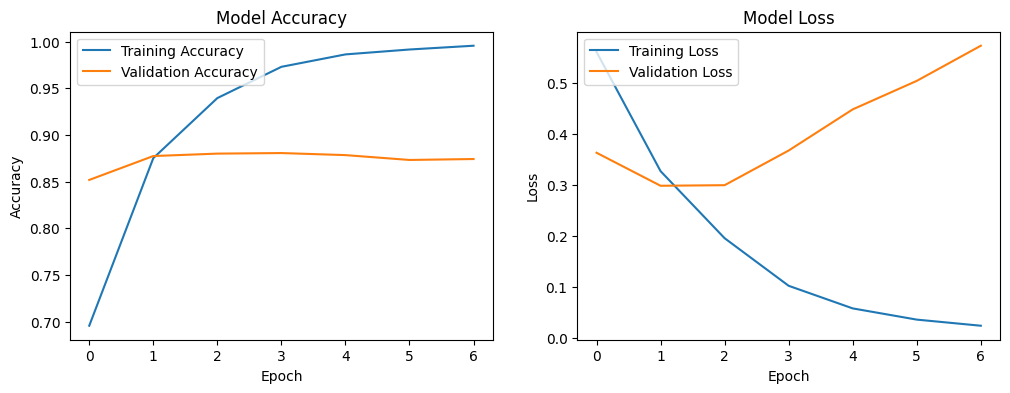

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
